In [3]:
import pandas as pd
# load the dataset
Sales_dataset = pd.read_csv("C://CODSOFT/Sales_Prediction/advertising.csv")

In [4]:
# load the first five rows
print(Sales_dataset.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [5]:
# Explore the dataset
# check for info
print(Sales_dataset.info())
# describe the dataset
print(Sales_dataset.describe())
# check for null 
print(Sales_dataset.isna().sum())
# check for duplicated values
print(Sales_dataset.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
0


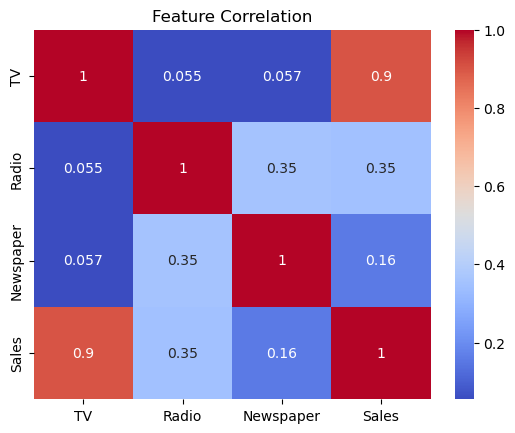

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize correlations
sns.heatmap(Sales_dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [7]:
# Features
X = Sales_dataset[['TV']]
# target variable
y = Sales_dataset['Sales']


In [8]:
# splitting into train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# model training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
# Prediction for X_test 
y_pred = model.predict(X_test)
# evaluating model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MSE: 6.101072906773964
RMSE: 2.470035001123256
R² Score: 0.802561303423698


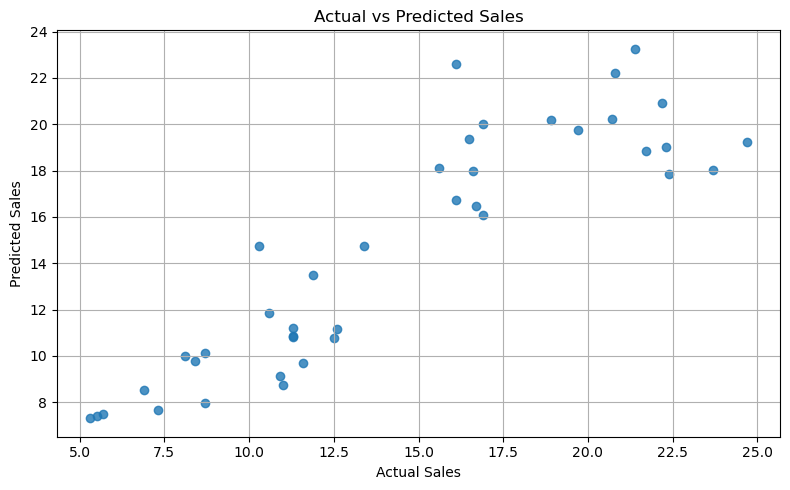

In [11]:
# visualisation
# scatter plot of actual vs predicted sales
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


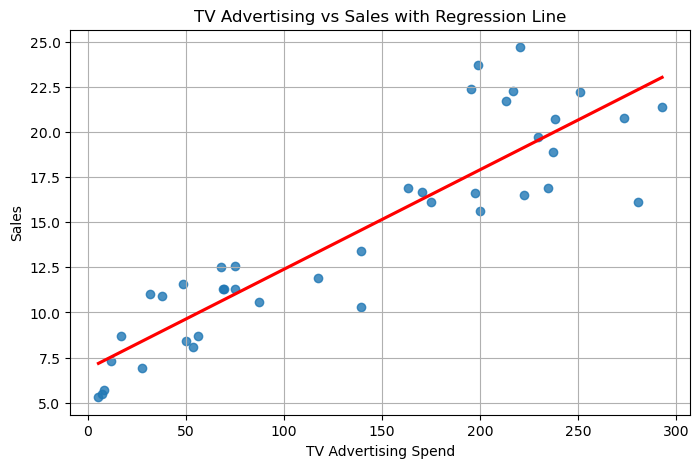

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot with regression line
plt.figure(figsize=(8,5))
sns.regplot(x=X_test, y=y_test, ci=None, line_kws={'color': 'red'})
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales with Regression Line')
plt.grid(True)
plt.show()


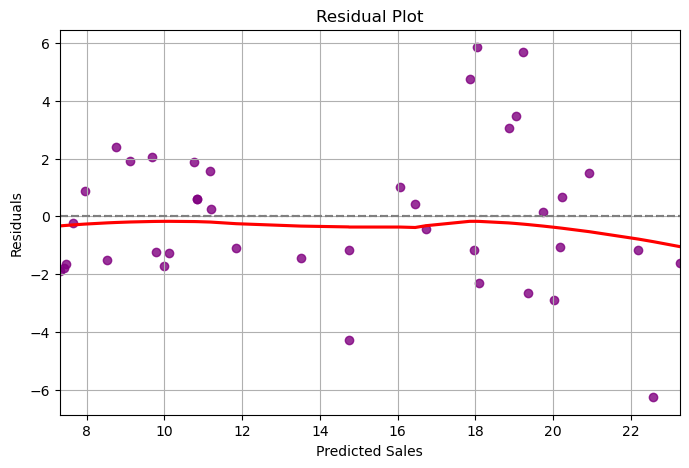

In [ ]:

residuals = y_test - y_pred
# scatter plot of residuals vs predicted
plt.figure(figsize=(8,5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='purple', line_kws={'color': 'red'})
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


In [14]:
import joblib
joblib.dump(model, "Sales_Prediction.pkl")

['Sales_Prediction.pkl']